In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from mps_explaineo.explanation_method import ExplanationMethod
from IPython.display import HTML, Image


## Explanation through explaineo
This notebook illustrates how explanation of rule-based decision-making systems through explaineo could look like. Note that this notebook contains screenshots of the Neo4j Bloom application that is used to visualise and question the graphdatabase, and thus not fully grasp the interactive nature of the actual explanation. However, it should provide some feeling on what someone could see when interacting with Bloom, without having to intstall and use the explaineo package and any used applications.

We adapted the taxonomy of user needs from [18] to rule-based systems and the legal domain. Table 1 presents the relevant explanation types for automated legal decisions, divided into two categories. The system category includes global explanations on the general decision model, while the decision category includes local explanations regarding a specific decision-making instance. These question-types are used in the examples below, which contains an explanation for the individuals that create and verify the decision-models (global focus) and the users of a service that need to explain decisions to the ones affected by the decision (local focus).

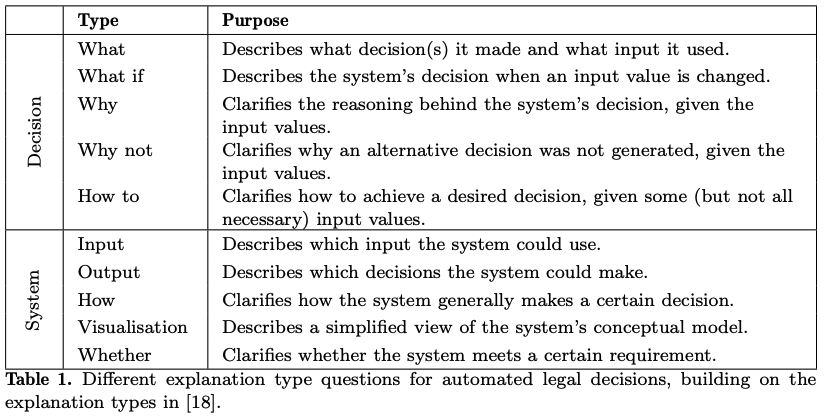

[18] ] Lim BY, Dey AK. Assessing demand for intelligibility in context-aware applications. In:
Proceedings of the 11th International Conference on Ubiquitous computing. Association
for Computing Machinery; 2009. p. 195-204.


### Example - The Tax Interest Service 
Here, we use the decision-making service for calculating tax-interests in an early state before deployment at the Dutch Tax and Customs Administration (meaning, the explanation models are not finished, making them relevant for the intented use of explanation: verification). More on this example is given the corresponding masterthesis on Human-centred explanation of rule-based decision-making systems in the legal domain (see https://studenttheses.uu.nl/handle/20.500.12932/44522).


In [40]:
# NOTE: make sure you have your Neo4j database {decision_name} running 
# and the mps models (in xml) saved in the directory \data\{decision_name} 
decision_name = 'belastingrente'

#### Building the explanation method

In [41]:
# Create the explanation method, containing a global (ge) and local (le) explanation
explanation_method = ExplanationMethod.from_decision_name(decision_name)
ge = explanation_method.global_explanation
le = explanation_method.local_explanation

# In case you want to re-make the explanation method or changed datafiles, delete 
# any contents of the Neo4j graph database:
# explanation_method.delete_all_graph()

In [43]:
HTML(f"""
    <div style="display: flex; align-items: flex-start;">
            <img src={"../mps_explaineo/media/relations.png"} style="width:20%"> </img>
            <img src={"../mps_explaineo/media/nodes.png"} style="width:20%"> </img>
    </div>
    """)

#### Explanation for the Modelling Expert - Creation and Verification

##### Visualisation-type questions of the conceptual models - Creation

In [44]:
display(HTML("""
    <div style="display:flex; justify-content:center; align-items:center; flex-wrap:wrap;">
        <div style="margin:10px;">
            <h3>Wat is het Objectmodel?</h3>
            <img src="../mps_explaineo/media/model_object.png" alt="Objectmodel">
        </div>
        <div style="margin:10px;">
            <h3>Wat is het Regelmodel?</h3>
            <img src="../mps_explaineo/media/model_regel.png" alt="Regelmodel">
        </div>
        <div style="margin:10px;">
            <h3>Wat is het Servicemodel?</h3>
            <img src="../mps_explaineo/media/model_service.png" alt="Servicemodel">
        </div>
    </div>
"""))

##### Whether-type questions - Verification

In [26]:
display(HTML(f"""
       <div style="display: flex; align-items: stretch; padding:10px; width:60%;">
              <div style="display: flex; flex-direction: column; justify-content: flex-start; width:50%">
                     <div style="flex: 1;">
                     <h3> Worden alle in- en uitvoerberichten gebruikt? </h3>
                     </div>
                     <div style="flex: 1;">
                     {ge.path_check_inoutput()} 
                     </div>
                     <br>
                     <br>
                     <div style="flex: 1;">
                     {ge.path_check_inoutput(output_type='html_table')}
                     </div>
              </div>
              <div style="display: flex; flex-direction: column; justify-content: flex-start; width:50%">
                     <img src="../mps_explaineo/media/whether_inoutservice.png"> </img>
              </div>
       </div>

    """))

,Type,Bericht,Path
0,Uitvoer,uitvoerBetalingen,True
1,Uitvoer,uitvoerNaheffing,True
2,Uitvoer,uitvoerBelastingplichtige,True
3,Invoer,invoerAangifte,True
4,Invoer,invoerBetaling,True
5,Invoer,invoerBelastingplichtige,True


In [27]:
display(HTML(f"""
       <div style="display: flex; align-items: stretch; padding:10px; heigh:100%;">
              <div style="display: flex; flex-direction: column; justify-content: flex-start; width:40%">
                     <div style="flex: 1;">
                            <h3> Worden alle invoervariabelen gebruikt om iets voor de uitvoer te berekenen? </h3>
                     </div>
                     <div style="flex: 1;">
                            {ge.service_check_input()} 
                     </div>
                     <br>
                     <div style="flex: 1;">
                            {ge.service_check_input(output_type='html_table')}
                     </div>
                     <br>
                     <div style="flex: 1;">
                            <h3> Kunnen alle uitvoervariabelen worden berekend, gegeven de invoervariabelen? </h3>
                     </div>
                     <div style="flex: 1;">
                            {ge.service_check_output()} 
                     </div>
                     <br>
                     <div style="flex: 1;">
                            {ge.service_check_output(output_type='html_table')}
                     </div>
              </div>
              <img src="../mps_explaineo/media/whether_paths.png", style="width:60%"> </img>
       </div>
    """))

,Invoer,Variabele,Path
0,Aangifte,einddatum betaaltermijn,True
1,Aangifte,openstaand bedrag,True
2,Aangifte,datum ter beschikkingstelling dividend,True
3,Betaling,betaaldatum,True
4,Betaling,betaald bedrag,True
5,Belastingplichtige,datum dagtekening naheffing,True
6,Belastingplichtige,datum suppletie op aangifte,True
7,Belastingplichtige,verzoek om suppletie op aangifte,True
,Uitvoer,Variabele,Path
0,Betalingen,belastingrente verschuldigd wegens te late betaling,True


In [28]:
display(HTML(f"""
       <div style="display: flex; align-items: stretch; padding:10px; heigh:100%;">
              <div style="display: flex; flex-direction: column; justify-content: flex-start; width:40%">
                     <div style="flex: 1;">
                            <h3> Worden alle variabelen gebruikt? </h3>
                     </div>
                     <div style="flex: 1;">
                            {ge.path_check_variables()} 
                     </div>
                     <br>
                     <br>
                     <div style="flex: 1;">
                            {ge.path_check_variables(output_type='html_table')}
                     </div>
              </div>
              <img src="../mps_explaineo/media/whether_paths.png", style="width:50%"> </img>
       </div>
    """))

,Object,Variabele,Path
0,Betaling,betaald na 1e kwartaal van kalenderjaar volgend op jaar van ter beschikkingstelling dividend,Voorwaarde
1,Betaling,betaaldatum,Voorwaarde
2,Betaling,grondslag bedrag van de te laat betaalde belasting,Berekening
3,Betaling,tijdig betaald,Voorwaarde
4,Betaling,begindatum renteperiode te laat betaalde belasting,Uitvoer
5,Betaling,belastingrente over grondslag bedrag van de te laat betaalde belasting,Berekening
6,Betaling,betaald bedrag,Berekening
7,Betaling,einddatum renteperiode te laat betaalde belasting,Uitvoer
8,Betaling,belastingrente verschuldigd wegens te late betaling,Voorwaarde
9,Aangifte,datum ter beschikkingstelling dividend,Berekening


In [29]:
display(HTML(f"""
       <div style="display: flex; align-items: flex-start; padding:10px;">
              <div style="display: flex; flex-direction: column; justify-content: flex-start; width:40%">
                     <div style="flex: 1;">
                            <h3> Worden alle variabelen toegekend? </h3>
                     </div>
                     <div style="flex: 1;">
                            {ge.assignment_check_variables()} 
                     </div>
                     <br>
                     <br>
                     <div style="flex: 1;">
                            {ge.assignment_check_variables(output_type='html_table')}
                     </div>
              </div>
              <img src="../mps_explaineo/media/whether_assignment_variabelen.png", style="width:60%;"> </img>
       </div>
    """))

,Naam,Assignment
0,grondslag bedrag van de te laat betaalde belasting,Regel
1,einddatum renteperiode te laat betaalde belasting,Geen assignment
2,belastingrente over grondslag bedrag van de te laat betaalde belasting,Regel
3,betaaldatum,Invoer
4,1 januari van het jaar volgend op het jaar waarin dividend ter beschikking is gesteld,Regel
5,totaal aan grondslagen te late betalingen,Regel
6,belastingrente over grondslag nageheven belasting,Regel
7,1 april van het jaar volgend op het jaar waarin dividend ter beschikking is gesteld,Regel
8,begindatum renteperiode te laat betaalde belasting,Geen assignment
9,betaald bedrag,Invoer


#### Logic checks

In [30]:
display(HTML(ge.logic_check_rules()))
display(HTML(ge.logic_check_rules(output_type='html_table')))

,Regel,VariabeleInConditie,AantalPaden
0,Begindatum renteperiode nageheven belasting 01,belastingrente verschuldigd wegens niet (volledig) betalen,1
1,Aangifte volledig betaald 01,openstaand bedrag,1
2,Betaling tijdig betaald 01,betaaldatum,1
3,Betaling tijdig betaald 01,einddatum betaaltermijn,1
4,Totaal aan belastingrente over totaal grondslagen te late betalingen 01,belastingrente verschuldigd wegens te late betaling,1
5,Vast te stellen naheffingsaanslag 02,1 april van het jaar volgend op het jaar waarin dividend ter beschikking is gesteld,1
6,Belastingrente verschuldigd 02,volledig betaald,1
7,Belastingrente verschuldigd 02,tijdige suppletie op aangifte gedaan,1
8,Belastingrente verschuldigd 02,verzoek om suppletie op aangifte,1
9,Belastingrente verschuldigd 02,vastgesteld op of na 1 april in het kalenderjaar volgend op het kalenderjaar waarin dividend ter beschikking is gesteld,1


#### Explanation for the Legal Support Proffesionals - Explanation

##### What-type questions

In [55]:
# What? (only certain variable value)
what_variabele = "openstaand bedrag"
what_object = "Aangifte"

display(HTML(f"""
       <div style="display: flex; align-items: flex-start; width:100%; padding:10px;">
              <div style="flex-direction: column; justify-content: flex-start; width:50%; padding:10px;">
                     <div style="flex: 1;">
                            <h3>  Wat is het {what_variabele} van de {what_object}? </h3>
                     </div>
                     <div style="flex: 1;">
                            {le.what(what_variabele, what_object)} 
                     </div>
              </div> 
    """))

# What? (Describes what decision(s) it made and what input it used.)
rule_amount = 6 # indicate how many used rules will be shown
display(HTML(f"""
       <div style="display: flex; align-items: flex-start; width:100%; padding:10px;">
              <div style="flex-direction: column; justify-content: flex-start; width:50%; padding:10px;">
                     <div style="flex: 1;">
                            <h3> Welke beslissingen heeft het systeem genomen? </h3>
                     </div>
                     <div style="flex: 1;">
                            {le.what_decisions()} 
                     </div>
                     <br>
                     <div style="flex: 1;">
                            <h3> Welke (persoonlijke) informatie is gebruikt voor deze beslissingen? </h3>
                     </div>
                     <div style="flex: 1;">
                            {le.what_personal_data()} 
                     </div>
              </div>
              <div style="flex: 1; display: flex; flex-direction: column; justify-content: flex-start; width:50%; padding:10px; overflow: hidden;">
                     <div style="flex: 1;">
                            <h3> Welke regels zijn gebruikt voor deze beslissingen? </h3>
                     </div>
                     <div style="flex: 1;">
                            {"<br>".join([html.data for html in le.what_rules()[:rule_amount]])} 
                     </div>
              </div>
       </div>
    """))


,Uitvoer,Variabele,Waarde
0,Betalingen,belastingrente over grondslag bedrag van de te laat betaalde belasting van de Betaling,8
1,Naheffing,totaal aan belastingrente over totaal grondslagen te late betalingen van de Vast te stellen naheffingsaanslag,8
2,Betalingen,grondslag bedrag van de te laat betaalde belasting van de Betaling,100
3,Betalingen,belastingrente verschuldigd wegens te late betaling van de Betaling,Waar
4,Naheffing,grondslag nageheven belasting van de Vast te stellen naheffingsaanslag,1000
5,Naheffing,totaal aan grondslagen te late betalingen van de Vast te stellen naheffingsaanslag,100
6,Belastingplichtige,belastingrente verschuldigd wegens niet (volledig) betalen van de Belastingplichtige,Waar
7,Naheffing,belastingrente over grondslag nageheven belasting van de Vast te stellen naheffingsaanslag,80
8,Belastingplichtige,belastingrente verschuldigd wegens te late betaling van de Belastingplichtige,Waar
9,Naheffing,begindatum renteperiode nageheven belasting van de Vast te stellen naheffingsaanslag,2022-01-01


##### Why-type questions

In [32]:
display(HTML(f"""
       <div style="display: flex; align-items: flex-start; width:100%; padding:10px;">
              <div style="flex-direction: column; justify-content: flex-start; width:50%; padding:10px;">
                     <div style="flex: 1;">
                            <h3> Waarom zijn deze beslissingen gemaakt? </h3>
                     </div>
                     <br>
                     <img src="../mps_explaineo/media/why_local.png", style="width:100%; margin:-2%;"> </img>
              </div>
              <div style="flex-direction: column; justify-content: flex-start; width:50%; padding:10px;">
                     <div style="flex: 1;">
                            <h3> Waarom zijn deze beslissingen gemaakt? (filtered) </h3>
                     </div>
                     <img src="../mps_explaineo/media/why_local_filtered.png", style="width:100%; margin:-2%;"> </img>
              </div> 
       </div>
       
    """))




In [57]:
# Why is this decision made?
why_decision = 'belastingrente verschuldigd wegens te late betaling' #CHANGEABLE
why_object = 'Belastingplichtige'


In [60]:
display(HTML(f"""
       <div style="display: flex; align-items: flex-start; width:100%; padding:10px;">
              <div style="flex-direction: column; justify-content: flex-start; width:50%; padding:10px;">
                     <div style="flex: 1;">
                            <h3> Waarom is de {why_object} {why_decision}? </h3>
                     </div>
                     <div style="flex: 1;">
                            {"<br>".join([html.data for html in le.why_decision(why_decision, why_object)])} 
                     </div>
                     <br>
                     <img src="../mps_explaineo/media/why_telatebetaling.png", style="width:100%; "> </img>
              </div>
              <div style="flex-direction: column; justify-content: flex-start; width:50%; padding:10px;">
                     <div style="flex: 1;">
                            <h3> Waarom is de {why_object} {why_decision}? (Trace) </h3>
                     </div>
                     <div>
                            {"<br>".join([html.data for html in le.why_paths(why_decision, why_object)])} 
                     </div>
              </div> 
       </div>
       <img src="../mps_explaineo/media/why_telatebetaling_paths.png", style="width:100%; margin-top:-20%; margin-bottom:-10%;"> </img>
    """))

##### Why-not type questions

In [58]:
# Why is not that decision made? NOTE: only works for unsigned values
why_not_decision = 'volledig betaald' #CHANGEABLE
why_not_object = 'Aangifte'


In [59]:
display(HTML(f"""
       <div style="display: flex; align-items: flex-start; width:100%; padding:10px;">
              <div style="flex-direction: column; justify-content: flex-start; width:50%; padding:10px;">
                     <div style="flex: 1;">
                            <h3> Waarom is de {why_not_object} niet {why_not_decision}? </h3>
                     </div>
                     <div style="flex: 1;">
                            {"<br>".join([html.data for html in le.why_decision(why_not_decision, why_not_object, negative=True)])} 
                     </div>
                     <br>
                     <img src="../mps_explaineo/media/why_not_volledigbetaald_blured.png", style="width:100%; margin:-10%;"> </img>
                     <div style="flex: 1;">
                            <h3>  Wat is het {what_variabele} van de {what_object}? </h3>
                     </div>
                     <div style="flex: 1;">
                            {le.what(what_variabele, what_object)} 
                     </div>
              </div> 
    """))


In [53]:

# What if?
# NOTE: not implemented, as explanation method does not re-calculate itself and there is no live integration.